## Análise exploratória de dados Covid-19 no estado do Ceará

### Dados públicos da API do SUS

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,Codigo Paciente,Estado Paciente,Codigo Municipio Paciente,Municipio Paciente,Bairro Paciente,Sexo Paciente,Idade Paciente,Data Notificacao,Data Inicio Sintomas
0,1f19004686ff1b66d38eb5fa511c22d1,CE,230280.0,CANINDE,PALESTINA,FEMININO,4.0,2020-05-15T03:00:00.000+0000,2020-05-05T03:00:00.000+0000
1,60f8183500fb88ab70bbf4aeedb2d815,CE,230526.0,IBARETAMA,SEDE,MASCULINO,20.0,2020-05-18T03:00:00.000+0000,2020-05-06T03:00:00.000+0000
2,d14c5c57266c9845199b5a4ac53c1066,CE,230400.0,COREAU,ARAQUEM,FEMININO,54.0,2020-05-28T03:00:00.000+0000,2020-05-27T03:00:00.000+0000
3,fa224e07d66a0997bfc532b81aba5098,CE,230100.0,AQUIRAZ,NaN,FEMININO,54.0,2020-05-28T03:00:00.000+0000,2020-05-27T03:00:00.000+0000
4,49521a7e3b6ccdf71685323fa5638843,CE,230690.0,JAGUARIBE,MARIA TEREZA,FEMININO,24.0,2020-05-20T03:00:00.000+0000,2020-05-02T03:00:00.000+0000


In [4]:
data.shape

(169153, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169153 entries, 0 to 169152
Data columns (total 9 columns):
Codigo Paciente              169153 non-null object
Estado Paciente              166360 non-null object
Codigo Municipio Paciente    169069 non-null float64
Municipio Paciente           169153 non-null object
Bairro Paciente              144596 non-null object
Sexo Paciente                169151 non-null object
Idade Paciente               168975 non-null float64
Data Notificacao             164196 non-null object
Data Inicio Sintomas         169153 non-null object
dtypes: float64(2), object(7)
memory usage: 11.6+ MB


In [6]:
data.describe()

,Codigo Municipio Paciente,Idade Paciente
count,169069.000000,168975.000000
mean,230577.482271,44.604480
std,312.008398,19.396053
min,230010.000000,0.000000
25%,230440.000000,31.000000
50%,230440.000000,42.000000
75%,230700.000000,58.000000
max,231410.000000,364.000000


In [7]:
## idade maxima encontrada: 364 (erro de digitacao)
max_idade = data['Idade Paciente'].max()
max_idade

364.0

In [8]:
for idx, value in enumerate(data['Idade Paciente']):
    if value == 364:
        print('Index: {} e Idade: {}'.format(idx, value))

Index: 87092 e Idade: 364.0


### Visualizando idades absurdas

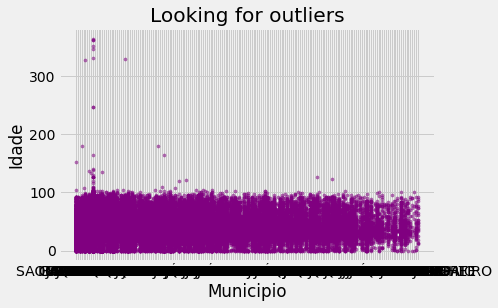

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.scatter(data['Municipio Paciente'], data['Idade Paciente'], alpha=0.5, s=10, c='purple')
plt.title("Looking for outliers")
plt.xlabel("Municipio")
plt.ylabel("Idade")
plt.show()

### Data Cleaning

#### Missing Values

In [10]:
data_missing = data.isnull().sum()

In [11]:
data_missing

Codigo Paciente                  0
Estado Paciente               2793
Codigo Municipio Paciente       84
Municipio Paciente               0
Bairro Paciente              24557
Sexo Paciente                    2
Idade Paciente                 178
Data Notificacao              4957
Data Inicio Sintomas             0
dtype: int64

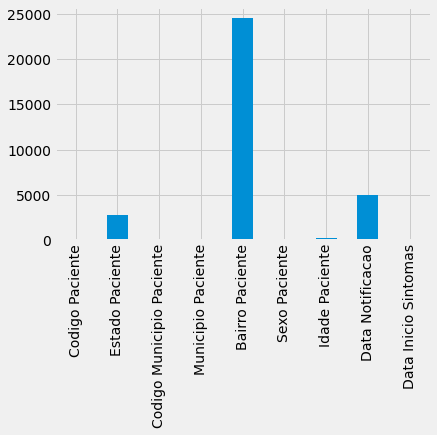

In [12]:
plt.style.use('fivethirtyeight')
data_missing.plot.bar()

### Excluir algumas columas

In [13]:
## remover o estado do paciente já que todos sao do Ceará
## nao me interessa saber o código do municipio do paciente
## a coluna da data de notificação pois tem muitos dias faltando e vou trabalhar com a data do inicio dos sintomas
## vou remover os bairros já que é uma coluna que está faltando quase 25 mil dados 

In [14]:
# axis=1 (remover colunas) - inplace=True é pra atribuir o novo dataframe a minha variavel data (sobrescrever)
data.drop(['Estado Paciente', 'Codigo Municipio Paciente', 'Data Notificacao', 'Bairro Paciente'], axis=1, inplace=True) 

In [15]:
data.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
0,1f19004686ff1b66d38eb5fa511c22d1,CANINDE,FEMININO,4.0,2020-05-05T03:00:00.000+0000
1,60f8183500fb88ab70bbf4aeedb2d815,IBARETAMA,MASCULINO,20.0,2020-05-06T03:00:00.000+0000
2,d14c5c57266c9845199b5a4ac53c1066,COREAU,FEMININO,54.0,2020-05-27T03:00:00.000+0000
3,fa224e07d66a0997bfc532b81aba5098,AQUIRAZ,FEMININO,54.0,2020-05-27T03:00:00.000+0000
4,49521a7e3b6ccdf71685323fa5638843,JAGUARIBE,FEMININO,24.0,2020-05-02T03:00:00.000+0000


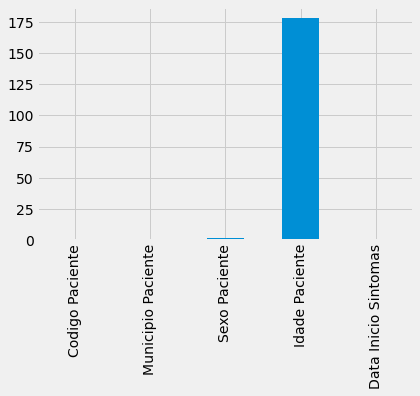

In [16]:
new_data_missing = data.isnull().sum()
plt.style.use('fivethirtyeight')
new_data_missing.plot.bar()

### Normalizando a data do inicio dos sintomas

In [17]:
data['Data Inicio Sintomas'] = pd.to_datetime(data['Data Inicio Sintomas'], utc=False)

In [18]:
data['Data Inicio Sintomas'] = data['Data Inicio Sintomas'].dt.date

In [19]:
data.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
0,1f19004686ff1b66d38eb5fa511c22d1,CANINDE,FEMININO,4.0,2020-05-05
1,60f8183500fb88ab70bbf4aeedb2d815,IBARETAMA,MASCULINO,20.0,2020-05-06
2,d14c5c57266c9845199b5a4ac53c1066,COREAU,FEMININO,54.0,2020-05-27
3,fa224e07d66a0997bfc532b81aba5098,AQUIRAZ,FEMININO,54.0,2020-05-27
4,49521a7e3b6ccdf71685323fa5638843,JAGUARIBE,FEMININO,24.0,2020-05-02


### Ordanando a data do início dos sintomas pra saber quando começou

In [20]:
dataset = data.sort_values(['Data Inicio Sintomas'], ascending=[1])

In [21]:
dataset

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
92890,ff00dad633e179a01f611d4380a28149,FORTALEZA,MASCULINO,71.0,2020-01-01
34698,d2ee67bae64a57f4cfd5ff50b22e1585,FORTALEZA,MASCULINO,31.0,2020-01-01
26696,3b6fda3852b4ef058f734e17058d10ab,FORTALEZA,MASCULINO,27.0,2020-01-01
123023,740f8f3fc2ac2cc6bb71ac0af698fa7b,FORTALEZA,MASCULINO,0.0,2020-01-01
100600,cce229d3f3ff5080be01b4c0202fb708,SAO BENEDITO,FEMININO,46.0,2020-01-01
162748,4385c78bdd1f189a2045b5d1fb8c33bf,SAO BENEDITO,FEMININO,30.0,2020-01-01
11490,d260fcde0546e27bf7777cd3f9f49814,FORTALEZA,MASCULINO,21.0,2020-01-01
11701,ee512ba8d2b0af2318b58d5ec6e151f7,LIMOEIRO DO NORTE,MASCULINO,41.0,2020-01-01
126818,16e93968aba5b6dd867f0d2675b8122d,FORTALEZA,FEMININO,38.0,2020-01-01
35985,1ad4693036995487e55100bf1221b9e0,FORTALEZA,FEMININO,32.0,2020-01-01


### Dataset Janeiro

In [63]:
data_jan = dataset.iloc[:83]

In [64]:
data_jan.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
92890,ff00dad633e179a01f611d4380a28149,FORTALEZA,MASCULINO,71.0,2020-01-01
34698,d2ee67bae64a57f4cfd5ff50b22e1585,FORTALEZA,MASCULINO,31.0,2020-01-01
26696,3b6fda3852b4ef058f734e17058d10ab,FORTALEZA,MASCULINO,27.0,2020-01-01
123023,740f8f3fc2ac2cc6bb71ac0af698fa7b,FORTALEZA,MASCULINO,0.0,2020-01-01
100600,cce229d3f3ff5080be01b4c0202fb708,SAO BENEDITO,FEMININO,46.0,2020-01-01


### Dataset Fevereiro

In [24]:
data_fev = dataset.iloc[83:372]

In [25]:
data_fev.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
31150,ac78124e61637fdfbdfad1229f023bde,FORTALEZA,MASCULINO,43.0,2020-02-01
27600,8a4a235cc04efa306b52d9e04aafd903,FORTALEZA,FEMININO,69.0,2020-02-01
16381,b8886af4d06ef5b31a15cc4cd29b933c,FORTALEZA,FEMININO,44.0,2020-02-01
84829,7f5ac3f6de7e48d36a8967cd51fded90,FORTALEZA,MASCULINO,35.0,2020-02-01
120236,5ca93d21163cd221f305a6b11248c593,FORTALEZA,FEMININO,57.0,2020-02-01


### Dataset Março

In [26]:
data_mar = dataset.iloc[372:11296]

In [27]:
data_mar.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
135748,cd3ade1d101da17810990d93ce3b8b73,ARACATI,FEMININO,52.0,2020-03-01
15756,a5b1ec1c82161a0cae7f237fda023a7c,FORTALEZA,MASCULINO,51.0,2020-03-01
84539,c003372ea28a928e578015818af156ac,FORTALEZA,MASCULINO,25.0,2020-03-01
84540,dd7a2d3b90db44afd732d089e36efb28,SOBRAL,MASCULINO,25.0,2020-03-01
84542,c88d4196f9129a686efcb6e68e8df12d,FORTALEZA,MASCULINO,25.0,2020-03-01


### Dataset Abril

In [28]:
data_abril = dataset.iloc[11296:67884]

In [29]:
data_abril.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
137103,44ed6778188a1599884d6f08336880a3,ITAITINGA,FEMININO,75.0,2020-04-01
137112,52e7950f58a9440e1dadeaac05f691ae,ITAITINGA,MASCULINO,42.0,2020-04-01
112733,f46800825829747454299f5e6776cad4,CANINDE,FEMININO,21.0,2020-04-01
57675,5d5a210d11f511eb64b195836606c40b,FORTALEZA,FEMININO,73.0,2020-04-01
75884,19a99cdff742a5e1cfd6bd810049eb0d,FORTALEZA,FEMININO,0.0,2020-04-01


### Dataset Maio

In [30]:
data_maio = dataset.iloc[67884:]

In [31]:
data_maio.head()

,Codigo Paciente,Municipio Paciente,Sexo Paciente,Idade Paciente,Data Inicio Sintomas
106559,3b38c8fe74fa49e97f873aeef7a774d5,ACOPIARA,FEMININO,20.0,2020-05-01
29422,c6f9e8b1c6d484a1efb4d98497fd992b,FORTALEZA,MASCULINO,46.0,2020-05-01
128635,fdb5786b6be239d8ba7f57be9ca896f6,FORTALEZA,FEMININO,5.0,2020-05-01
127807,5d832f91596f8339b083808a24934082,FORTALEZA,MASCULINO,49.0,2020-05-01
158691,2695312d942bee3e7834459f0aa08c34,CAUCAIA,MASCULINO,53.0,2020-05-01


### Quantas pessoas sentiram os sintomas por dia?
#### 21 pessoas que foram diagnosticadas com coronavírus apresentaram sintomas em 01/01/2020

In [32]:
date_group = dataset.groupby(['Data Inicio Sintomas']).count() 

In [33]:
date_group.rename({'Codigo Paciente': 'Qtde Paciente(s)'}, axis=1, inplace=True)

In [59]:
column_date = date_group[date_group.columns[0:1]]
column_date[:22]

,Qtde Paciente(s)
Data Inicio Sintomas,
2020-01-01,21
2020-01-02,3
2020-01-05,2
2020-01-06,4
2020-01-08,3
2020-01-09,3
2020-01-10,2
2020-01-12,1
2020-01-13,2


### Se 21 pessoas que foram confirmadas com coronavírus apresentaram os sintomas em 01/01/2020 e sabemos que os sintomas aparecem 14/15 dias depois da contaminação, logo as pessoas pegaram a doença ainda em Dezembro de 2019. 

### Visualizando casos confirmados no decorrer do tempo

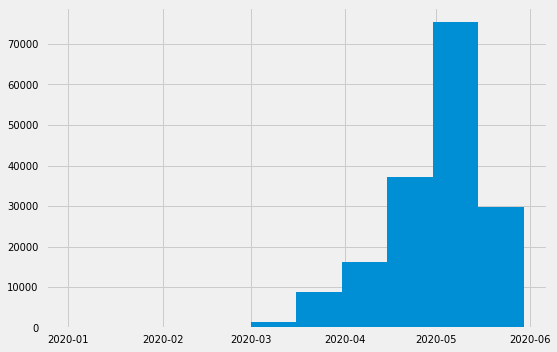

In [35]:
plt.style.use('seaborn-notebook')
dataset['Data Inicio Sintomas'].hist()

### Número do início dos sintomas em Janeiro

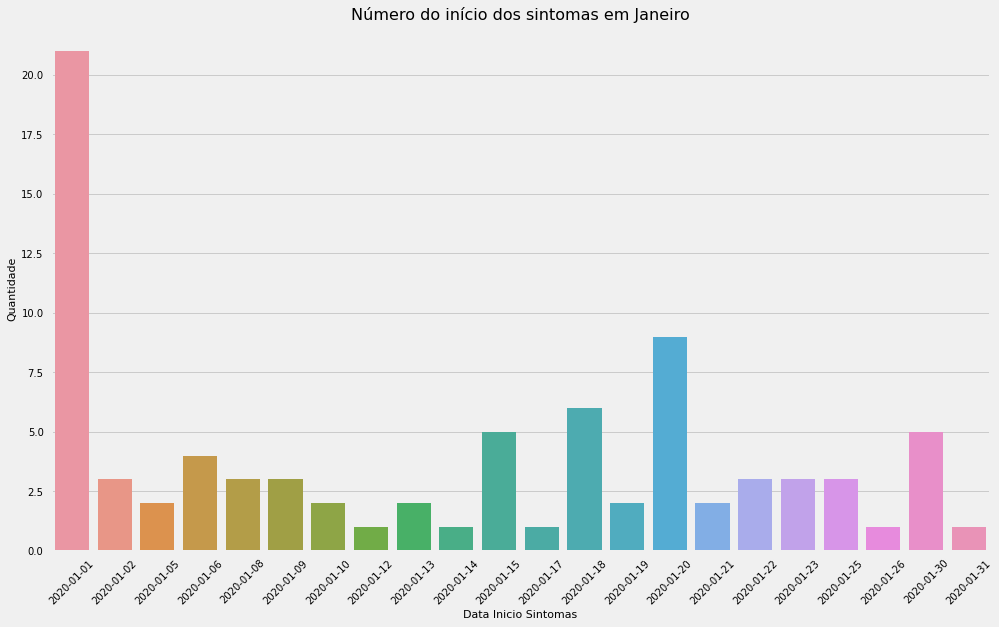

In [95]:
plt.figure(figsize = (15, 9))
plt.title('Número do início dos sintomas em Janeiro', y=1, size=16)
sns.countplot(x = data_jan['Data Inicio Sintomas'], data = dataset)
xt = plt.xticks(rotation=45)
y = plt.ylabel('Quantidade')

### Número do início dos sintomas em Fevereiro

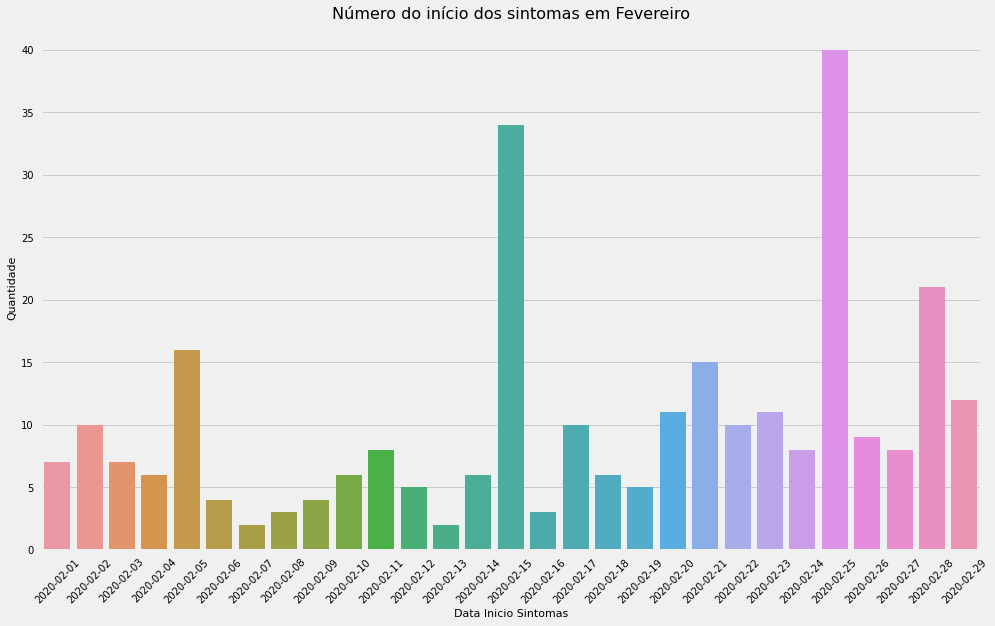

In [96]:
plt.figure(figsize = (15, 9))
plt.title('Número do início dos sintomas em Fevereiro', y=1, size=16)
sns.countplot(x = data_fev['Data Inicio Sintomas'], data = dataset)
xt = plt.xticks(rotation=45)
y = plt.ylabel('Quantidade')

### Número do início dos sintomas em Março

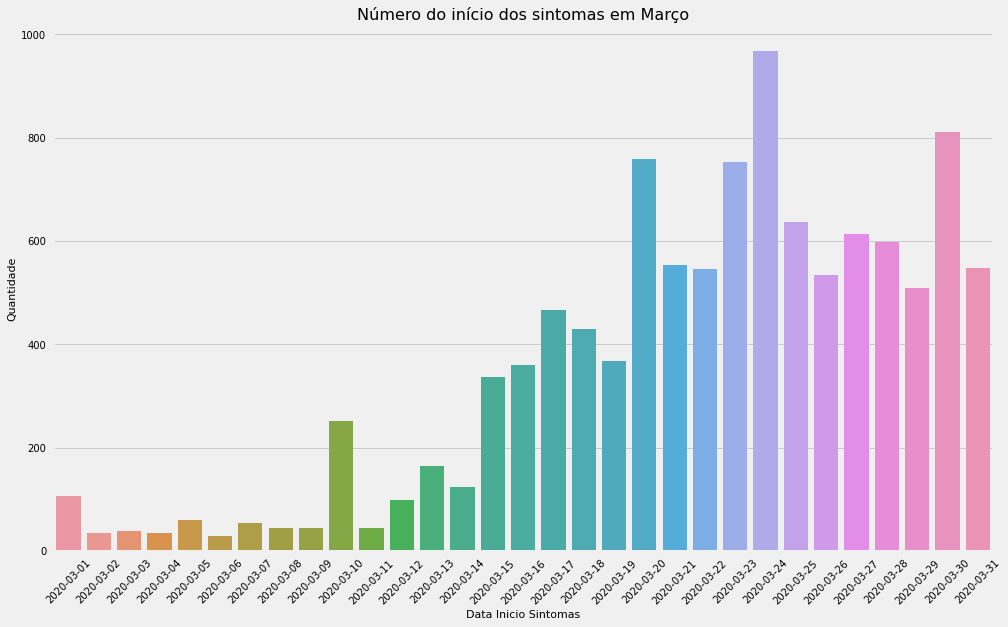

In [97]:
plt.figure(figsize = (15, 9))
plt.title('Número do início dos sintomas em Março', y=1, size=16)
sns.countplot(x = data_mar['Data Inicio Sintomas'], data = dataset)
xt = plt.xticks(rotation=45)
y = plt.ylabel('Quantidade')

### Número do início dos sintomas em Abril

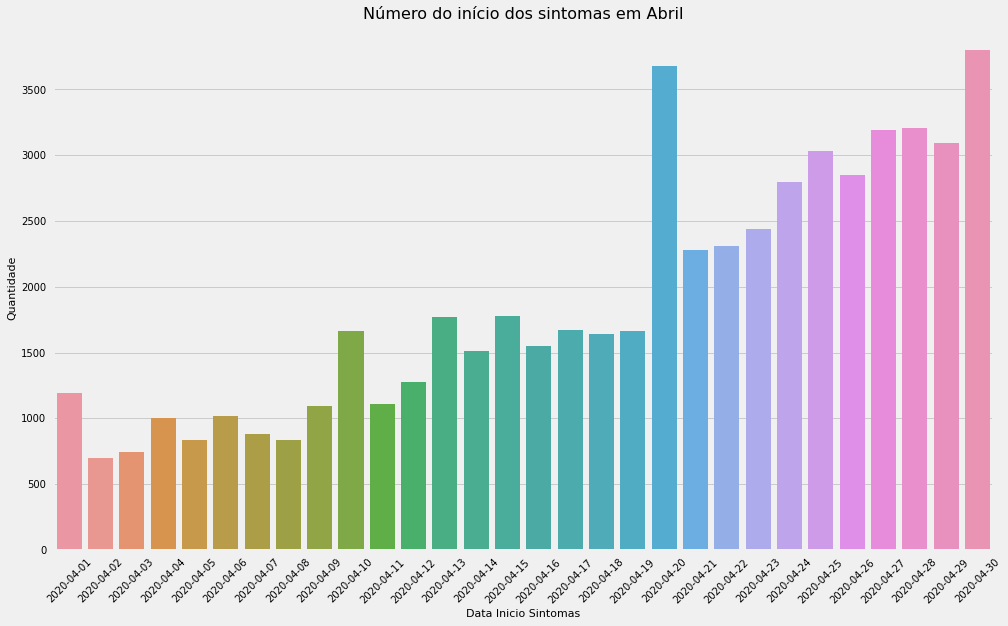

In [98]:
plt.figure(figsize = (15, 9))
plt.title('Número do início dos sintomas em Abril', y=1, size=16)
sns.countplot(x = data_abril['Data Inicio Sintomas'], data = dataset)
xt = plt.xticks(rotation=45)
y = plt.ylabel('Quantidade')

### Número do início dos sintomas em Maio

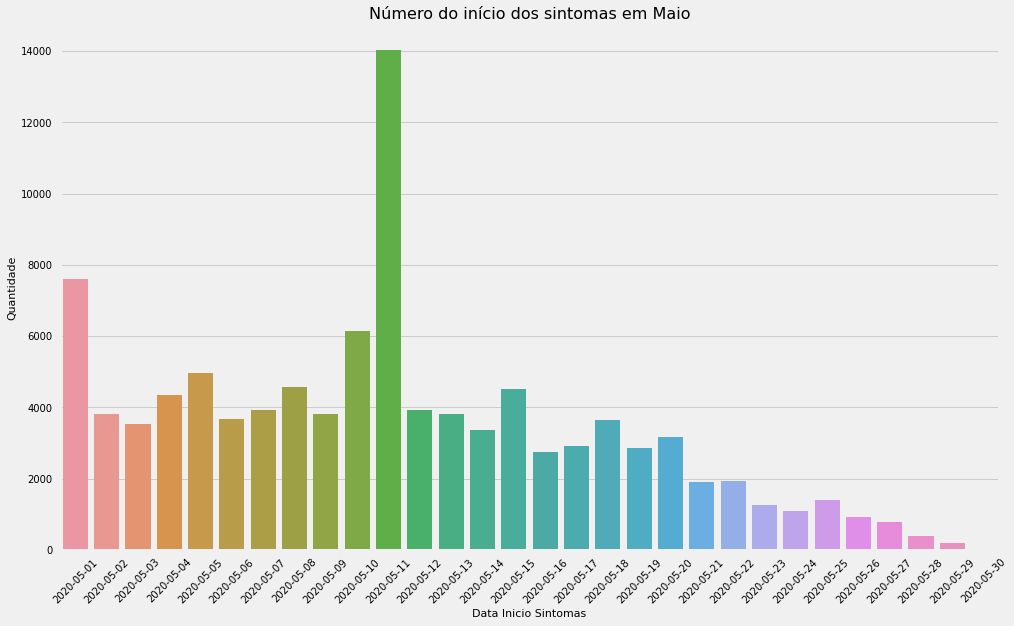

In [99]:
plt.figure(figsize = (15, 9))
plt.title('Número do início dos sintomas em Maio', y=1, size=16)
sns.countplot(x = data_maio['Data Inicio Sintomas'], data = dataset)
xt = plt.xticks(rotation=45)
y = plt.ylabel('Quantidade')

### Número de contaminação por sexo

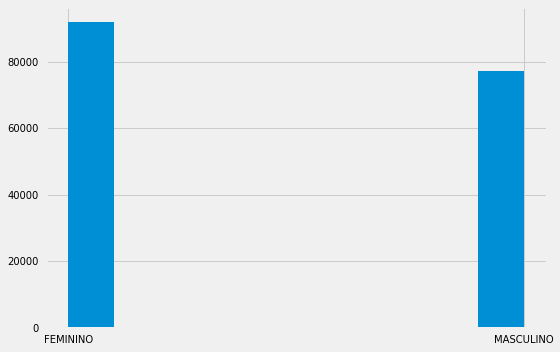

In [41]:
plt.style.use('seaborn-notebook')
data['Sexo Paciente'].hist()

### Idade / Sexo (Feminino - Masculino)

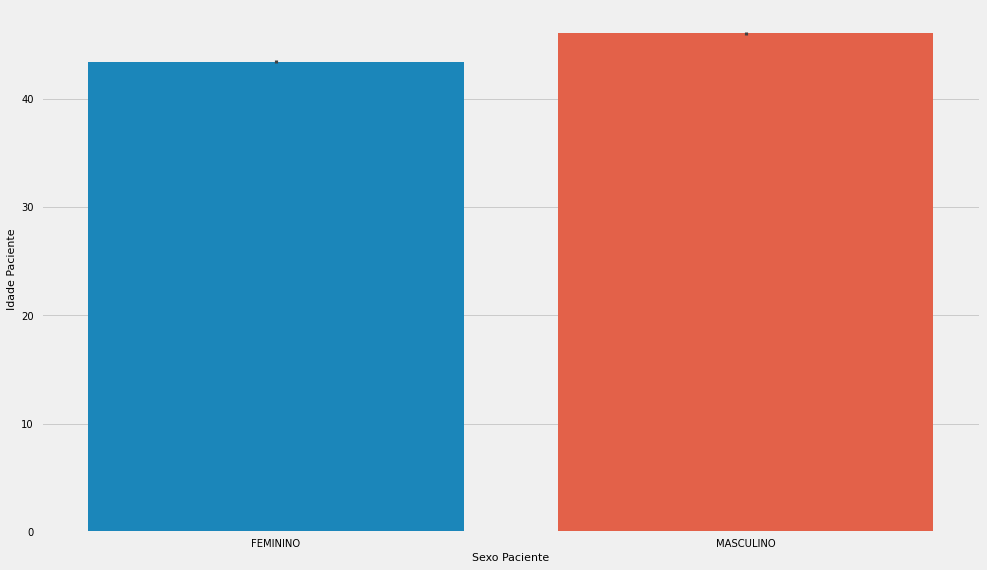

In [42]:
plt.figure(figsize = (15, 9))
sns.barplot(x = 'Sexo Paciente', y = "Idade Paciente", data = data)

### Número de casos por municípios em Janeiro

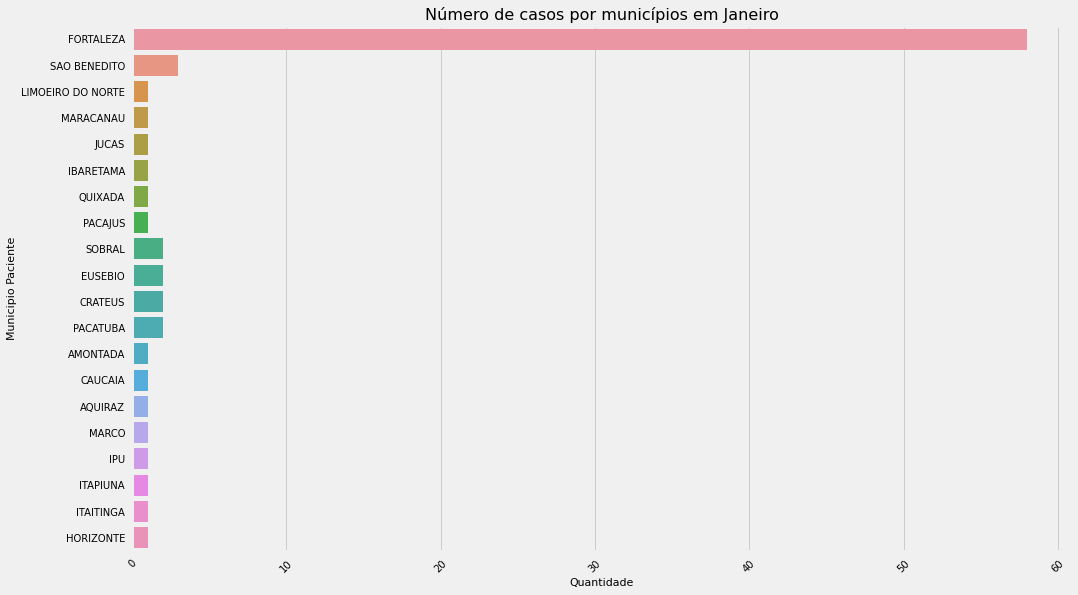

In [101]:
plt.figure(figsize = (15, 9))
plt.title('Número de casos por municípios em Janeiro', y=1, size=16)
sns.countplot(y = data_jan['Municipio Paciente'], data = dataset)
xt = plt.xticks(rotation=45)
x = plt.xlabel('Quantidade')

### Número de casos por municípios em Fevereiro

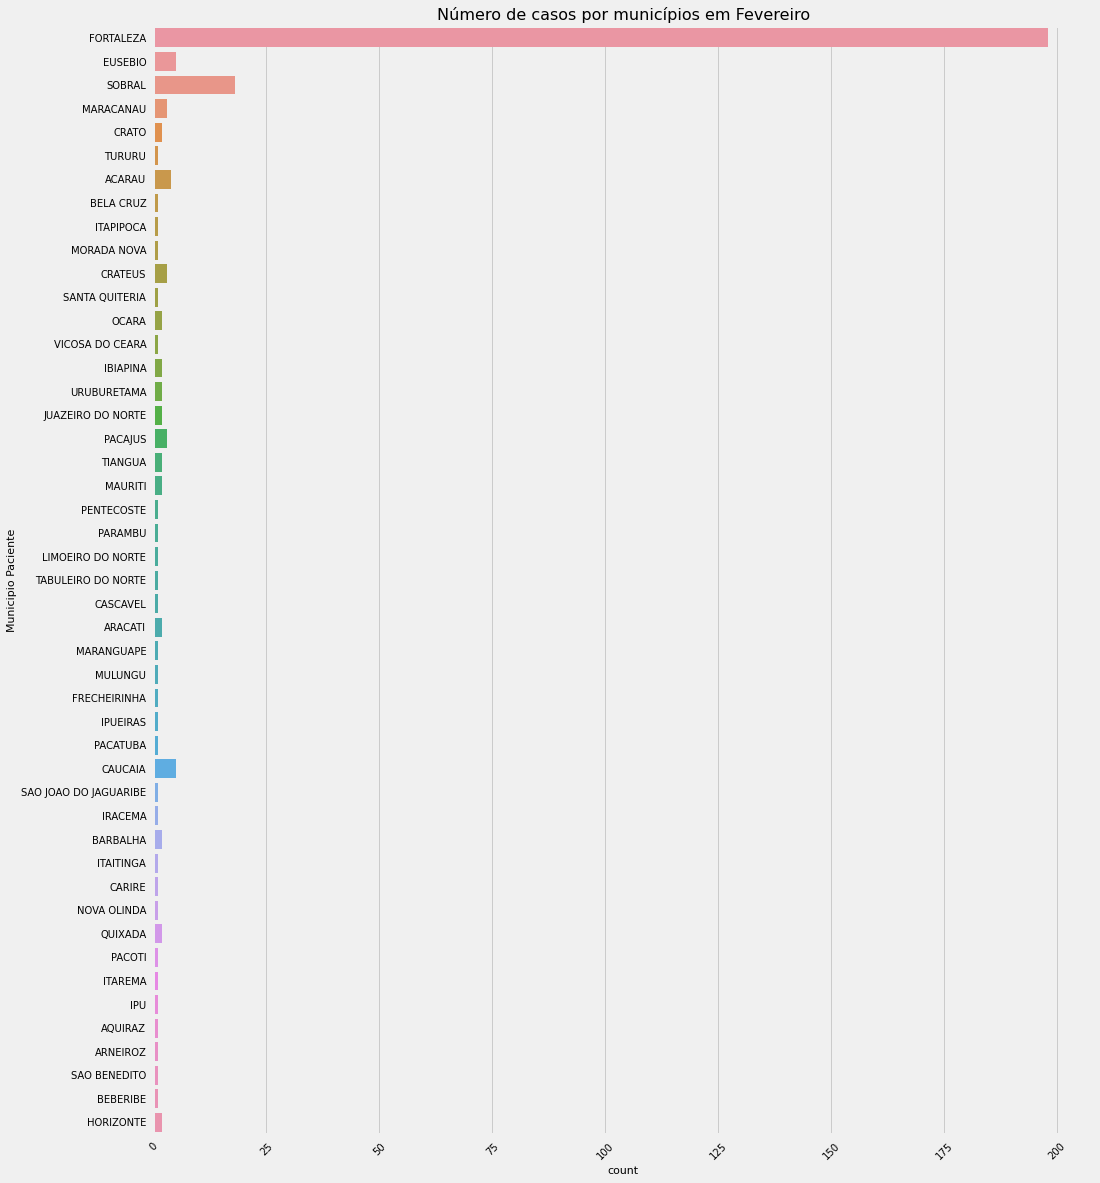

In [102]:
plt.figure(figsize = (15, 19))
plt.title('Número de casos por municípios em Fevereiro', y=1, size=16)
sns.countplot(y = data_fev['Municipio Paciente'], data = dataset)
xt = plt.xticks(rotation=45)

### Número de casos por municípios em Março

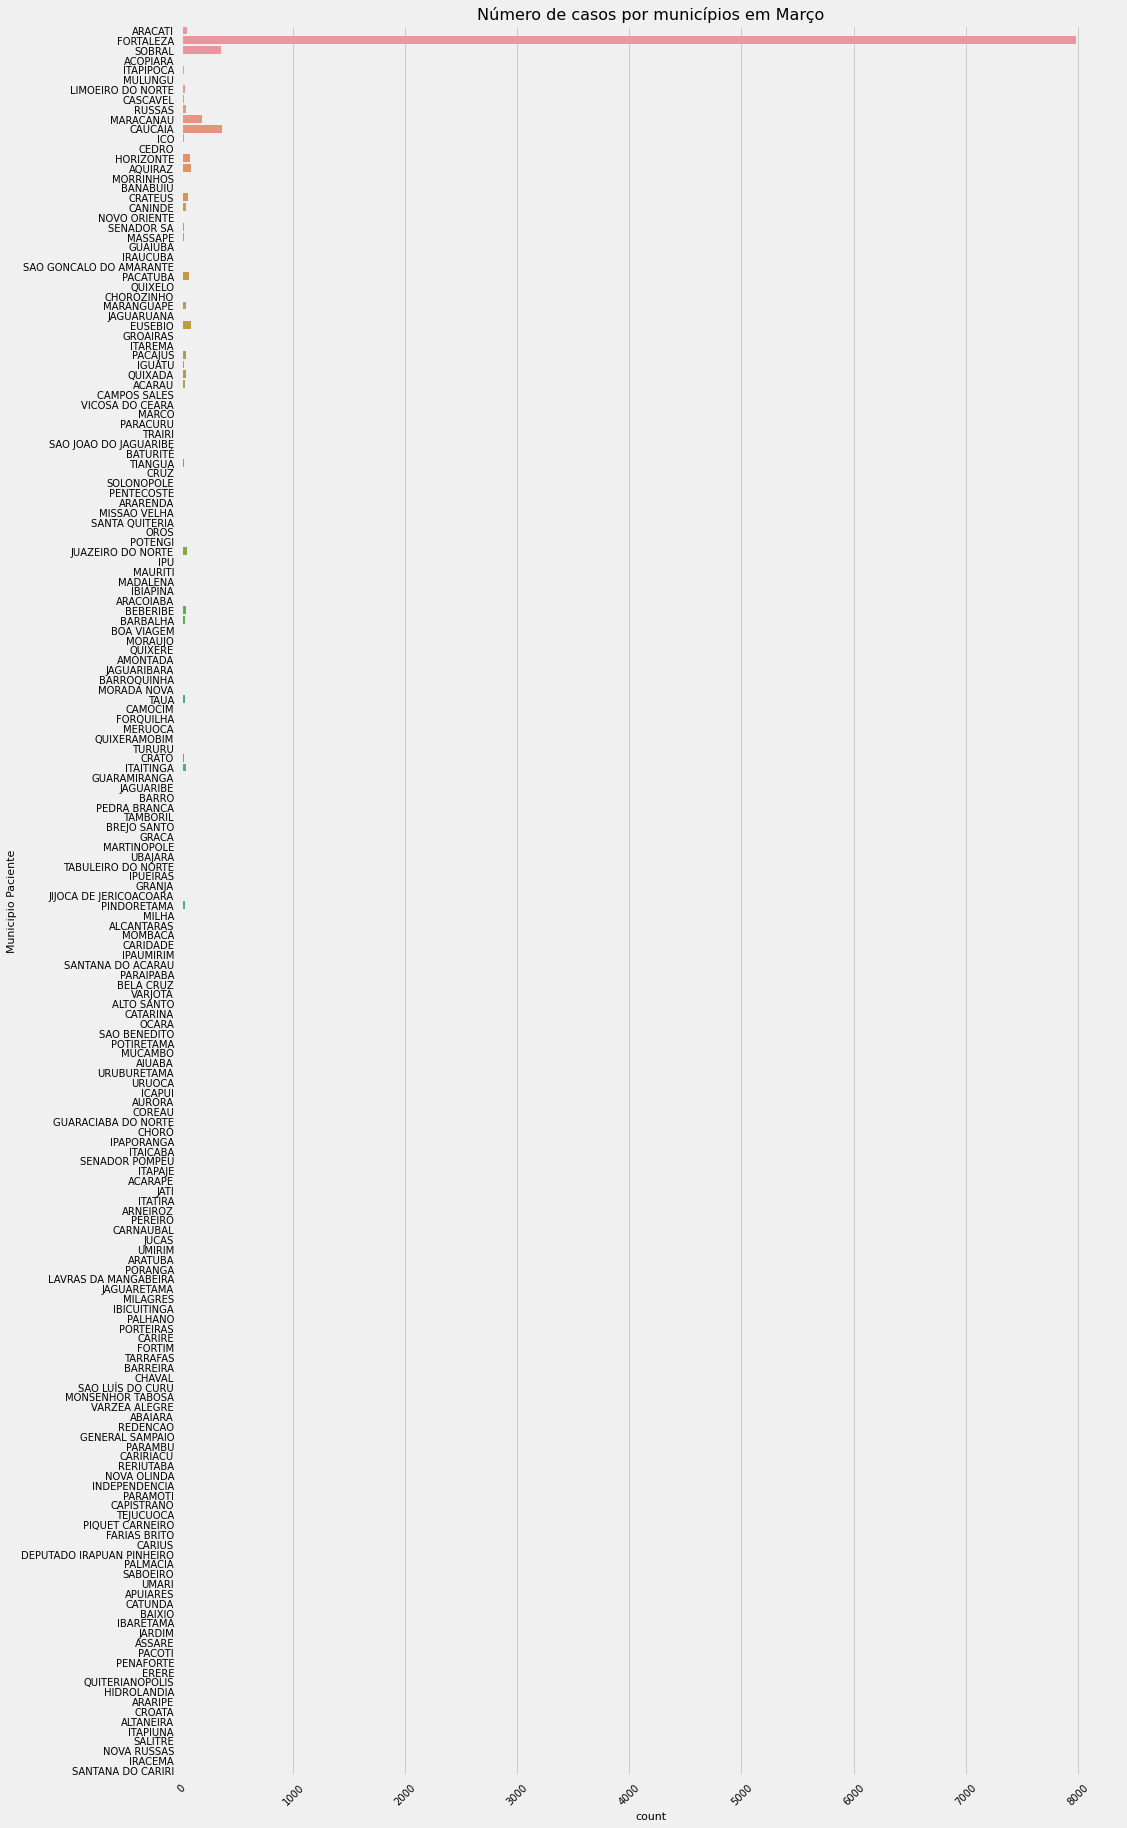

In [103]:
plt.figure(figsize = (15, 30))
plt.title('Número de casos por municípios em Março', y=1, size=16)
sns.countplot(y = data_mar['Municipio Paciente'], data = dataset)
xt = plt.xticks(rotation=45)

### Número de casos por municípios em Abril

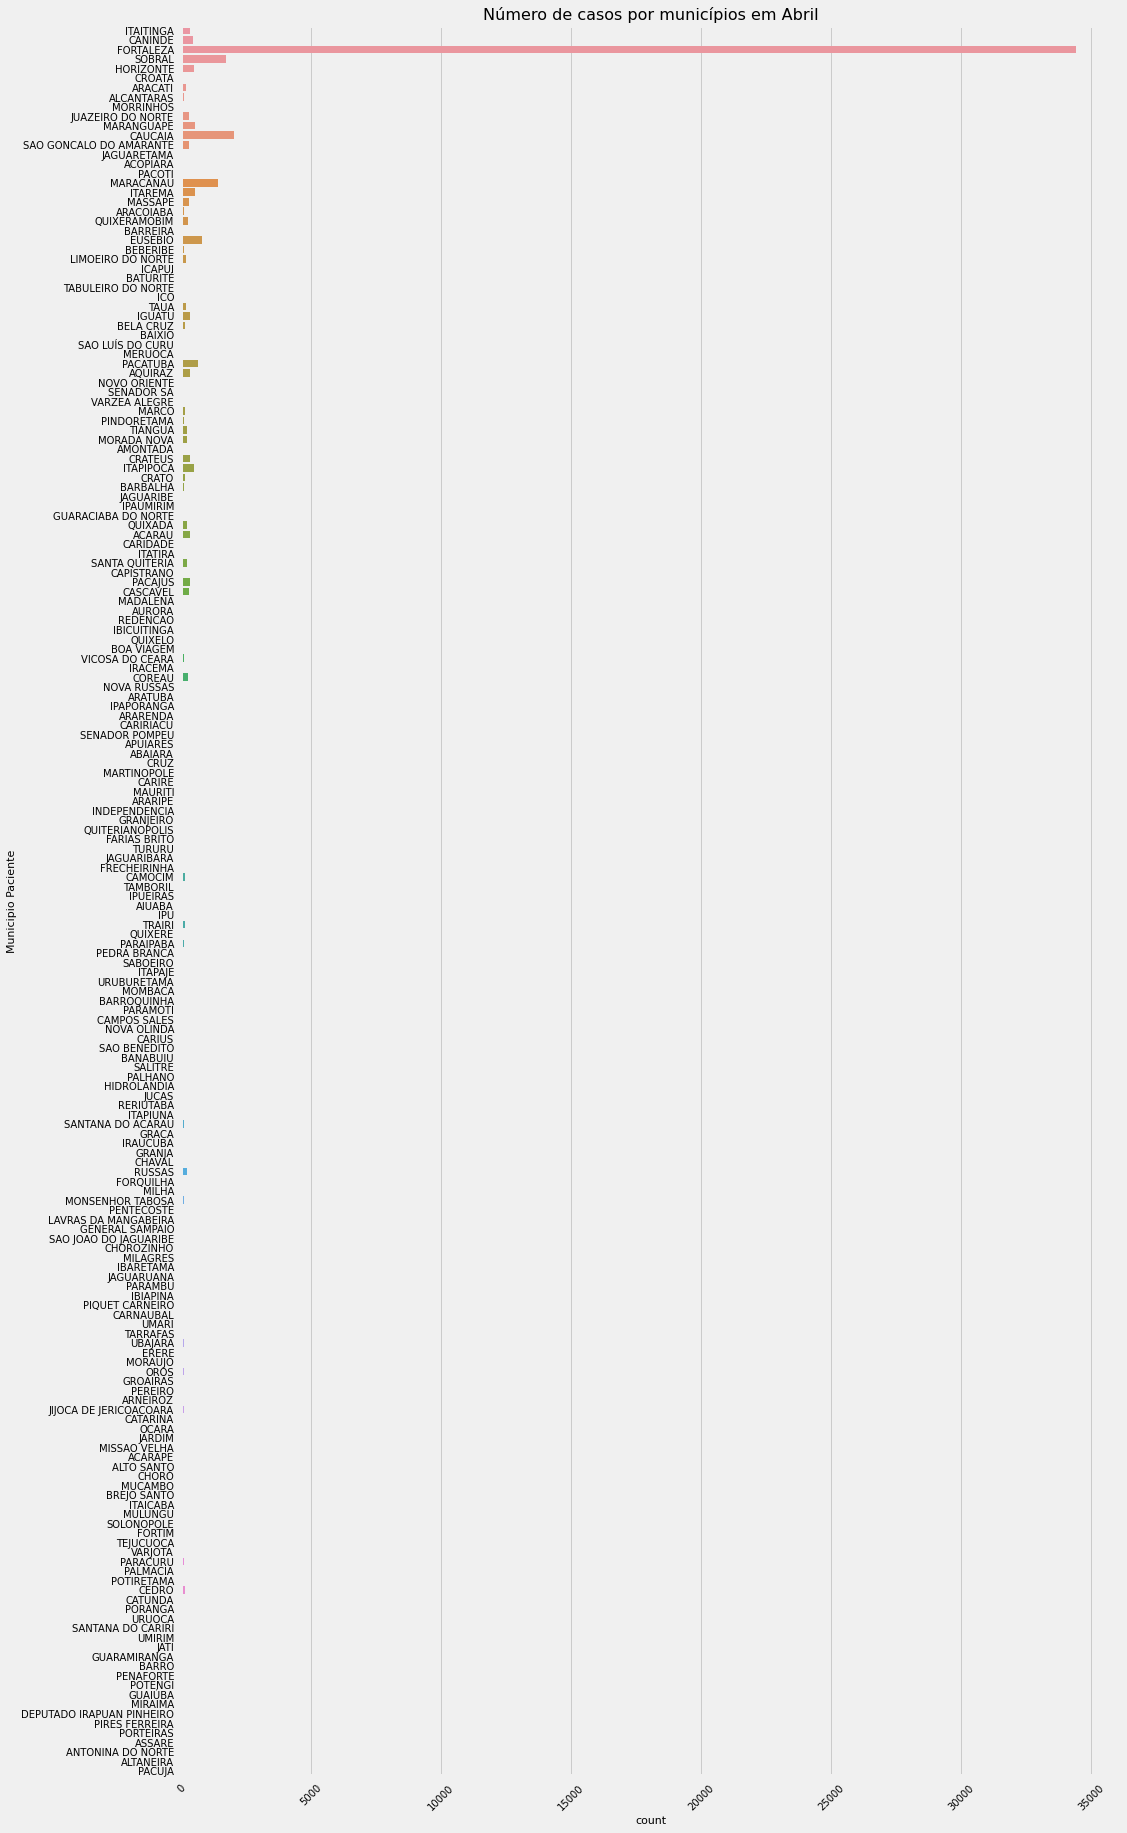

In [104]:
plt.figure(figsize = (15, 30))
plt.title('Número de casos por municípios em Abril', y=1, size=16)
sns.countplot(y = data_abril['Municipio Paciente'], data = dataset)
xt = plt.xticks(rotation=45)

### Número de casos por municípios em Maio

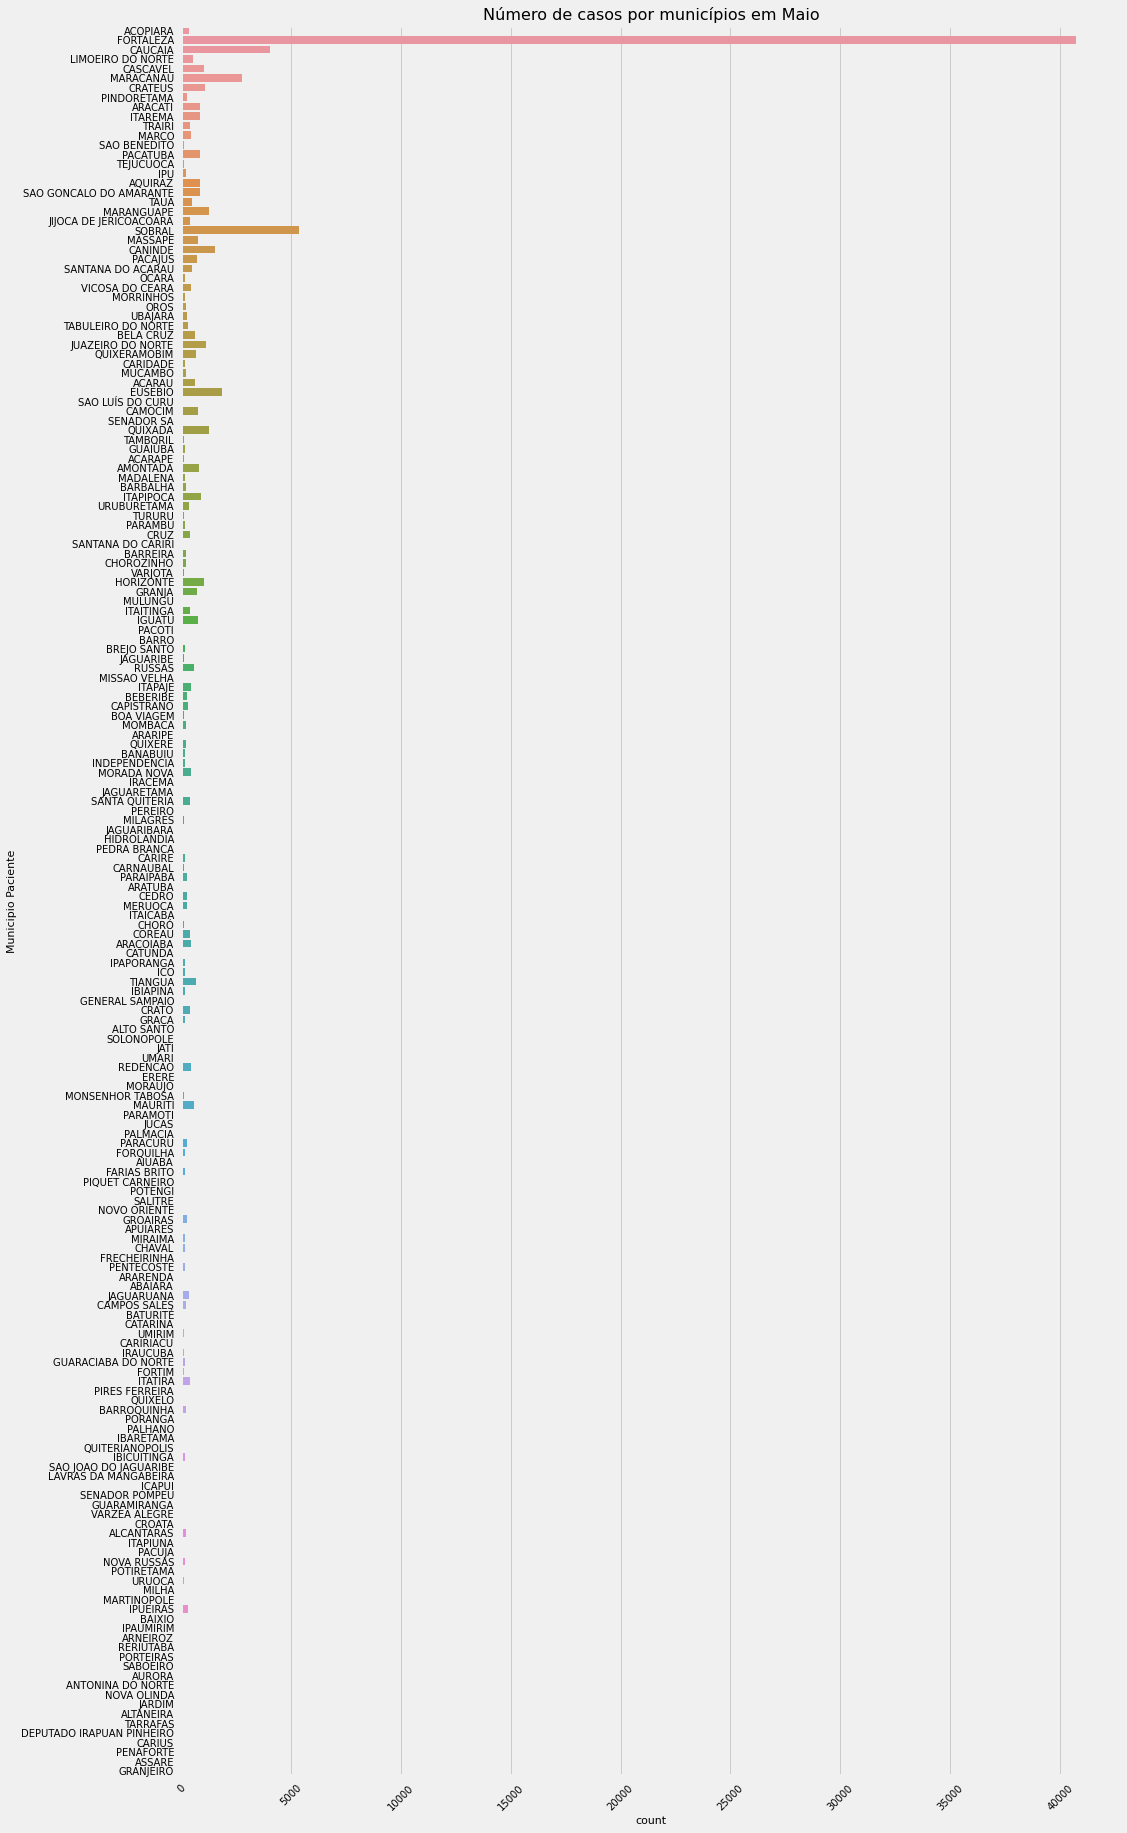

In [105]:
plt.figure(figsize = (15, 30))
plt.title('Número de casos por municípios em Maio', y=1, size=16)
sns.countplot(y = data_maio['Municipio Paciente'], data = dataset)
xt = plt.xticks(rotation=45)

### Fica evidente que a contaminação está aumentando nos interiores.

### Idade dos pacientes por municípios em Janeiro

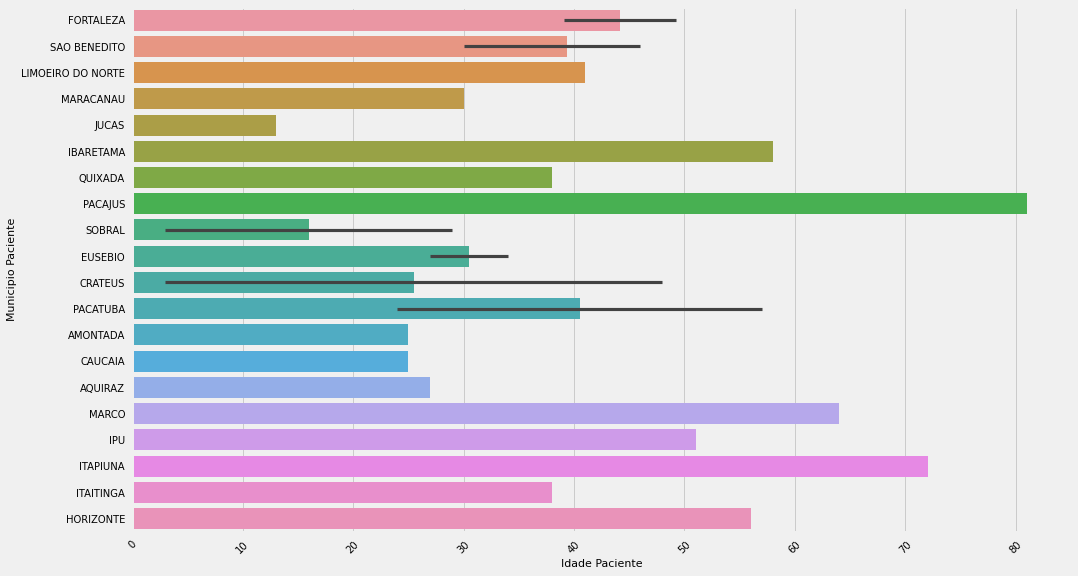

In [83]:
plt.figure(figsize = (15, 9))
sns.barplot(x = data_jan['Idade Paciente'] , y = data_jan['Municipio Paciente'] , data = dataset)
xt = plt.xticks(rotation=45)

### Em Janeiro, notamos que em geral a contaminação aconteceu através de pessoas que não estão na faixa etária do grupo de risco Covid-19. Nos municípios de Itapiuna, Marco e Pacajus a contaminação aconteceu com pessoas com idade acima de 60 anos.

### Idade dos pacientes por municípios em Fevereiro

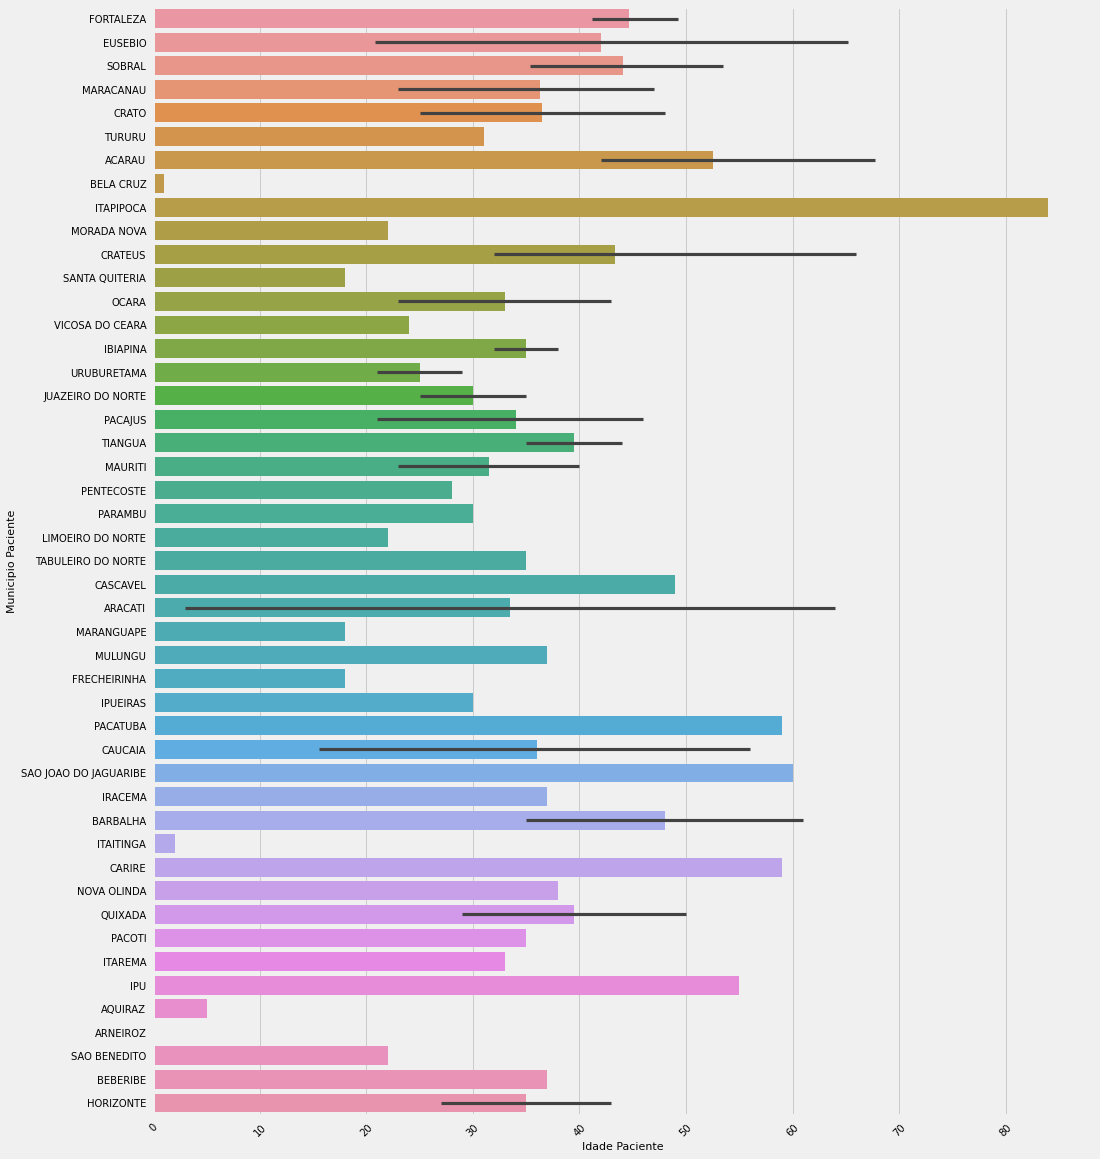

In [85]:
plt.figure(figsize = (15, 19))
sns.barplot(x = data_fev['Idade Paciente'], y = data_fev['Municipio Paciente'] , data = dataset)
xt = plt.xticks(rotation=45)

### Em fevereiro, notamos que em geral a contaminação aconteceu através de pessoas que não estão na faixa etária do grupo de risco Covid-19 inclusive nos municípios: Arneiroz, Aquiraz, Itaitinga e Bela Cruz a contaminação se deu em crianças. Nos município de Barbalha, Itapipoca, Aracati, Crateus, Acarau e Eusébio a contaminação aconteceu com pessoas com idade acima de 60 anos.

### Idade dos pacientes por municípios em Março

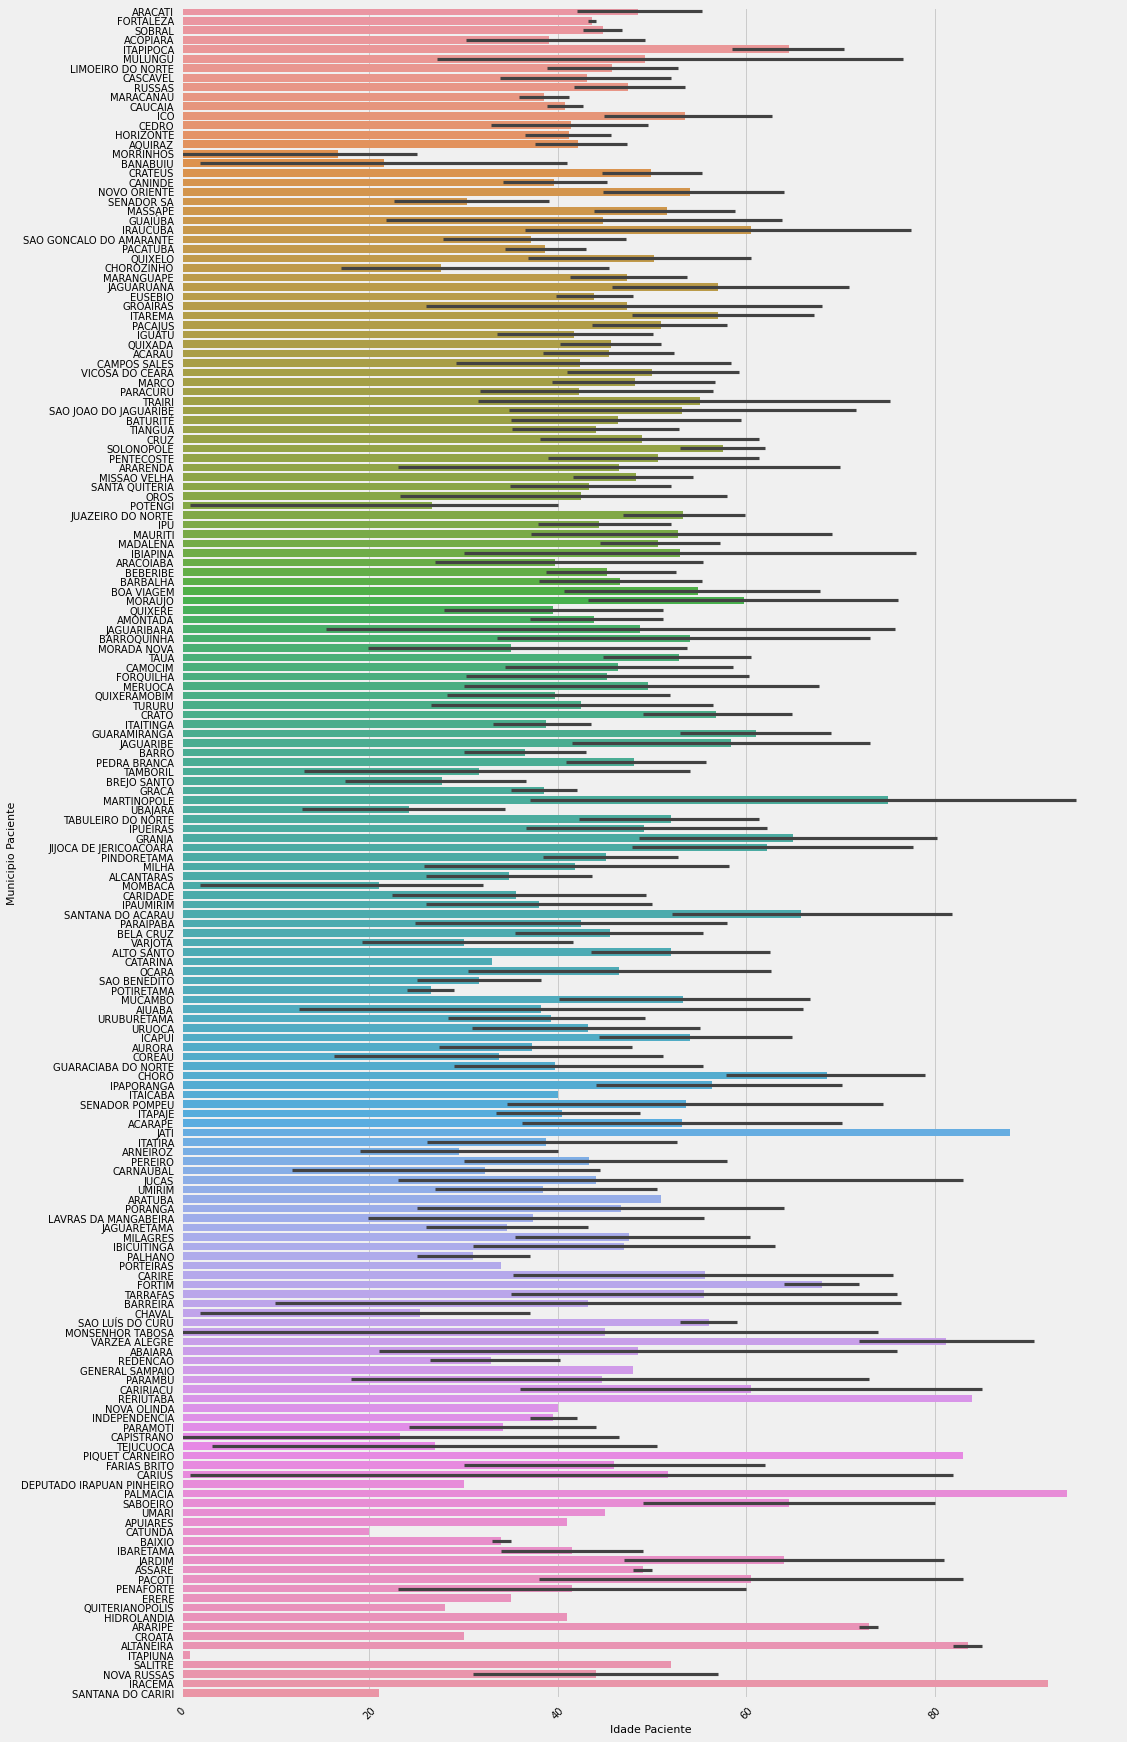

In [88]:
plt.figure(figsize = (15, 29))
sns.barplot(x = data_mar['Idade Paciente'], y = data_mar['Municipio Paciente'] , data = dataset)
xt = plt.xticks(rotation=45)

### Em Março, notamos que em geral a contaminação aconteceu através da faixa etária de 40 a 70 anos. Nos municípios de Martinopole, Santa do Acarau, Jati, Reriutaba, Piquet Carneiro, Palmacia, Altaneira e Iracema a contaminação aconteceu com pessoas com idade acima de 80 anos. Municípios como: Itapiuna, Catunda e Morrinhos a contaminação se deu entre jovens até 20 anos.

### Idade dos pacientes por municípios em Abril

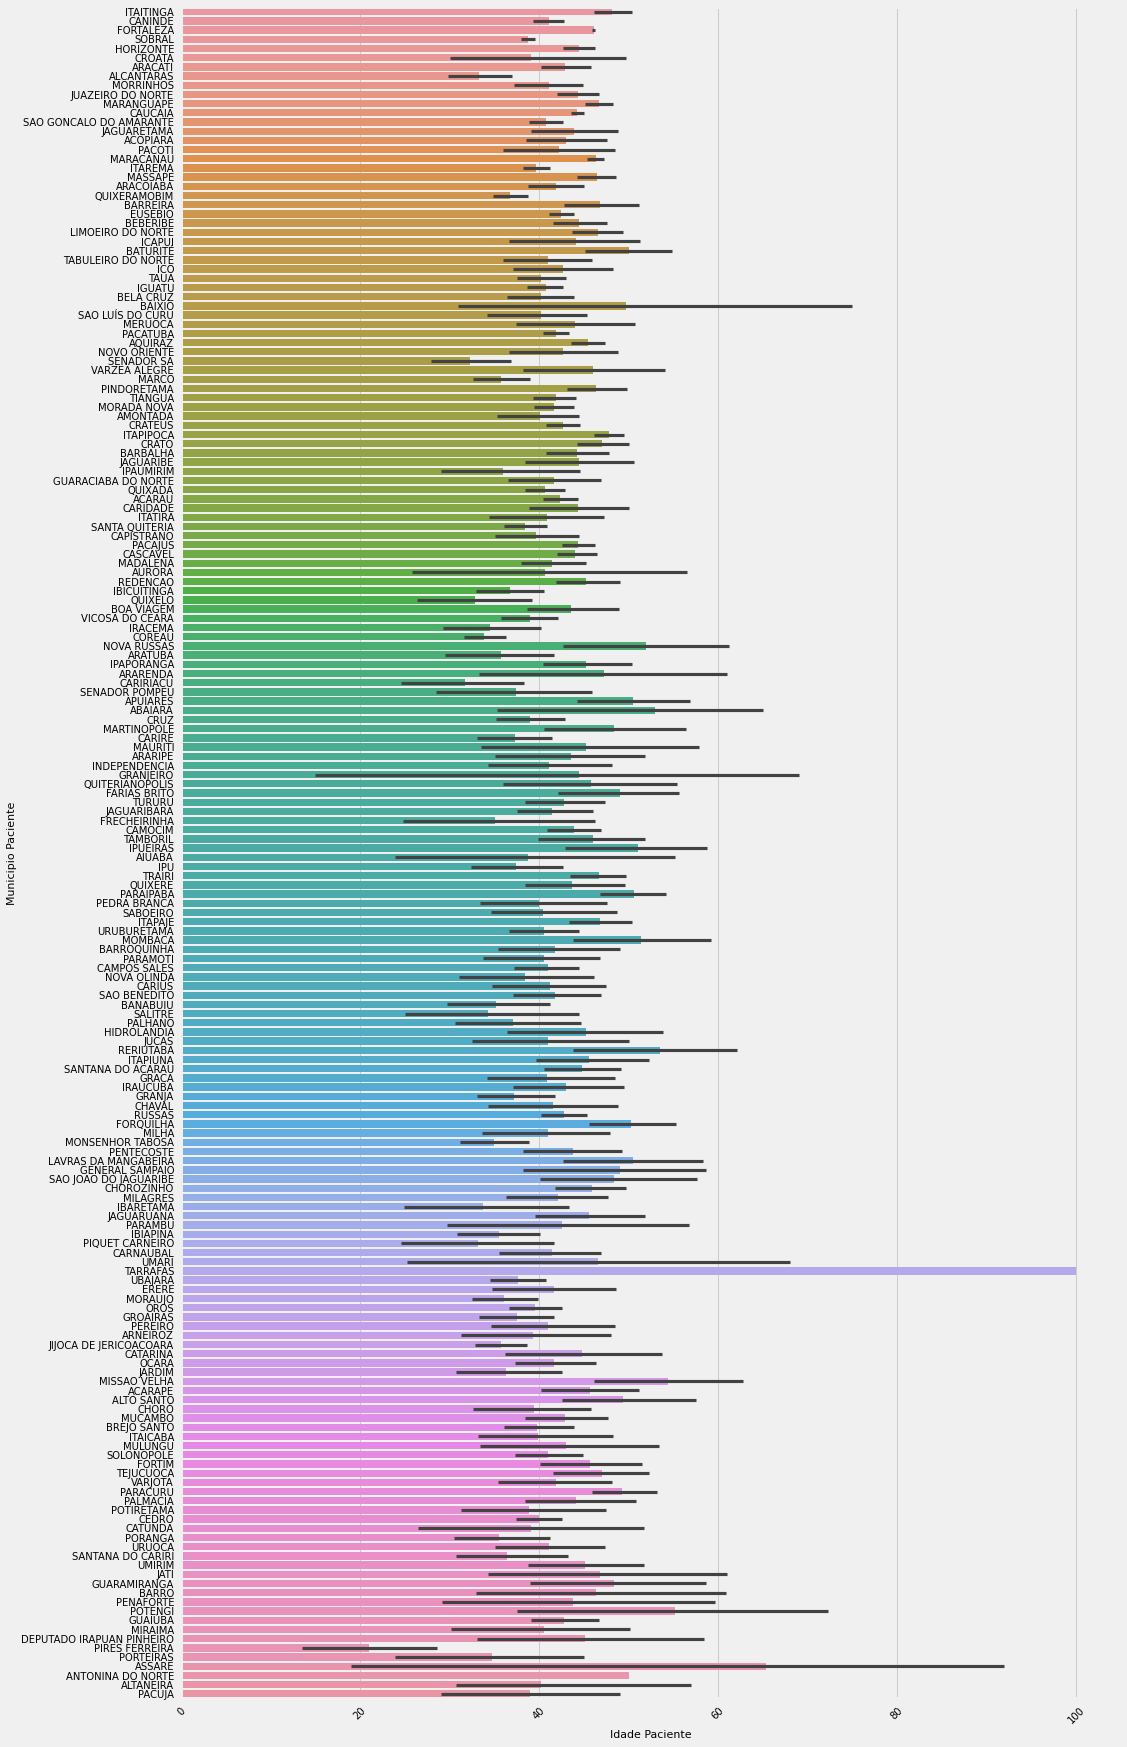

In [89]:
plt.figure(figsize = (15, 29))
sns.barplot(x = data_abril['Idade Paciente'], y = data_abril['Municipio Paciente'] , data = dataset)
xt = plt.xticks(rotation=45)

### Em Abril, notamos que em geral a contaminação aconteceu através da faixa etária entre 30 e 50 anos, ou seja, pessoas que não tem idade do grupo de risco Covid-19. Nos municípios de Baixio, Umari, Assaré e alguns outros a contaminação aconteceu com pessoas com idade acima de 60 anos.

### Idade dos pacientes por municípios em Maio

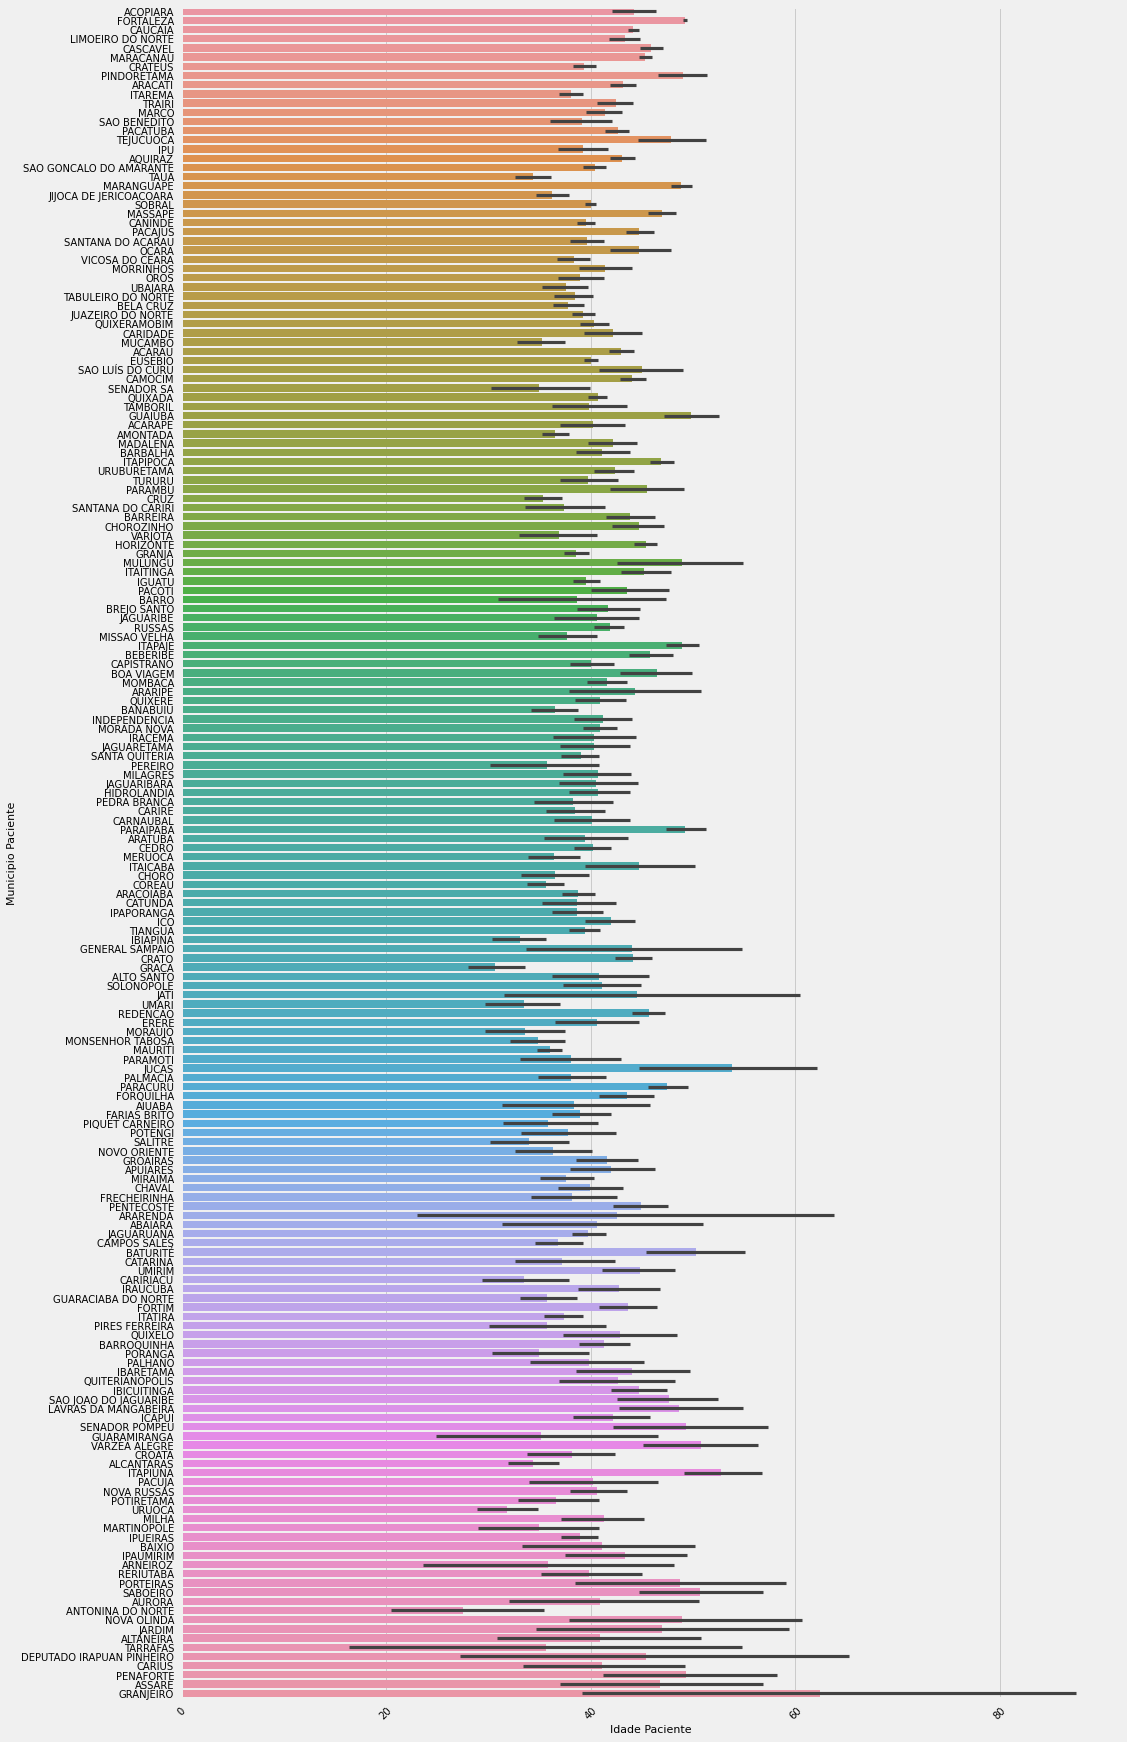

In [90]:
plt.figure(figsize = (15, 29))
sns.barplot(x = data_maio['Idade Paciente'], y = data_maio['Municipio Paciente'] , data = dataset)
xt = plt.xticks(rotation=45)

### Em Maio, notamos que em geral a contaminação aconteceu através de pessoas que não estão na faixa etária do grupo de risco Covid-19, praticamente todo o estado do Ceará com pessoas na média de 50 anos pra baixo. Nos municípios de Granjeiro, Ararenda, Deputado Irapuan Pinheiro, Nova Olinda e Jucas a contaminação aconteceu com pessoas com idade acima de 60 anos.

### Tabela contendo municípios, data do início dos sintomas e a qtde por dia em Janeiro

In [67]:
data_jan_test = data_jan.groupby(['Municipio Paciente', 'Data Inicio Sintomas']).count() 

In [68]:
data_jan_test.rename({'Codigo Paciente': 'Qtde Paciente(s)'}, axis=1, inplace=True)

In [70]:
column_date = data_jan_test[data_jan_test.columns[0:1]]

In [71]:
column_date

Qtde Paciente(s)
Municipio Paciente Data Inicio Sintomas                  
AMONTADA           2020-01-15                           1
AQUIRAZ            2020-01-19                           1
CAUCAIA            2020-01-18                           1
CRATEUS            2020-01-10                           1
                   2020-01-30                           1
EUSEBIO            2020-01-09                           1
                   2020-01-20                           1
FORTALEZA          2020-01-01                          17
                   2020-01-02                           2
                   2020-01-05                           2
                   2020-01-08                           2
                   2020-01-09                           2
                   2020-01-12                           1
                   2020-01-13                           2
                   2020-01-14                           1
                   2020-01-15                           4
                   2020-01-17                           1
                   2020-01-18                           5
                   2020-01-19                           1
                   2020-01-20                           5
                   2020-01-21                           1
                   2020-01-22                           2
                   2020-01-23                           3
                   2020-01-25                           3
                   2020-01-30                           3
                   2020-01-31                           1
HORIZONTE          2020-01-26                           1
IBARETAMA          2020-01-06                           1
IPU                2020-01-20                           1
ITAITINGA          2020-01-22                           1
ITAPIUNA           2020-01-21                           1
JUCAS              2020-01-06                           1
LIMOEIRO DO NORTE  2020-01-01                           1
MARACANAU          2020-01-02                           1
MARCO              2020-01-20                           1
PACAJUS            2020-01-06                           1
PACATUBA           2020-01-10                           1
                   2020-01-20                           1
QUIXADA            2020-01-06                           1
SAO BENEDITO       2020-01-01                           3
SOBRAL             2020-01-08                           1
                   2020-01-30                           1